# Doctor's Consultation Fees Prediction

**Problem Statement:**
    
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import power_transform,LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Train Dataset

In [2]:
#since it is xlsx file , lets use read_excel method
import pandas as pd
train= pd.read_excel('Final_Train.xlsx')

In [3]:
#train dataset
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
train.shape

(5961, 7)

In [5]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [6]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [7]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

These are columns with null values:
    
Miscellaneous_Info    2620

Place                   25

Rating                3302

In [8]:
#we have 2620 different values in Miscellaneous_Info.
#and also we already rating column and place column which is already extracted from Miscellaneous_info column
#there is no useful data to predict Target varibale in this column
train.drop(['Miscellaneous_Info'],axis = 1,inplace = True)
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


### Qualification Column

In [9]:
#In Qualification column we have below details:

#The only information we can extract from qualification column is :
#if doctor has only Bachelors or masters
#because we already have there profile details in profile column
train.Qualification

0                BHMS, MD - Homeopathy
1         BAMS, MD - Ayurveda Medicine
2       MBBS, MS - Otorhinolaryngology
3                  BSc - Zoology, BAMS
4                                 BAMS
                     ...              
5956                    MBBS, MS - ENT
5957                              MBBS
5958                              MBBS
5959       MBBS, MD - General Medicine
5960           BDS, MDS - Orthodontics
Name: Qualification, Length: 5961, dtype: object

In [10]:
Bachelors_list = ['BHMS','BAMS','BDS','BSc','MBBS']   #creating the list of bachelor degrees

Masters_list = ['MD', 'MS', 'MF', 'DNB', 'MDS','DDVL','IBCLC','AFIH','DDV','PGD']  #creating the list of master degrees

train['Qualification_new'] = 'Bachelors'  #first lets make everything As "Bachelors'"

x = 0 #row number

for i in train.Qualification:
    for j in Masters_list:
        if j in str(i).split():
            train.loc[[x],'Qualification_new'] = 'Masters'
            break
    x += 1

In [11]:
train.loc[:,['Qualification','Qualification_new']]

,Qualification,Qualification_new
0,"BHMS, MD - Homeopathy",Masters
1,"BAMS, MD - Ayurveda Medicine",Masters
2,"MBBS, MS - Otorhinolaryngology",Masters
3,"BSc - Zoology, BAMS",Bachelors
4,BAMS,Bachelors
...,...,...
5956,"MBBS, MS - ENT",Masters
5957,MBBS,Bachelors
5958,MBBS,Bachelors
5959,"MBBS, MD - General Medicine",Masters


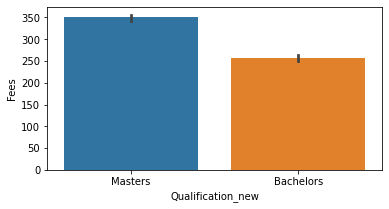

In [12]:
plt.figure(figsize= (6,3))
sns.barplot(x ='Qualification_new',y = 'Fees' , data = train)
plt.show()

We can clearly see that doctors fee is high who have completed masters.

### Experience Column

In [13]:
#Lets begin with experience columns by extracting useful information
train.Experience.head()

0    24 years experience
1    12 years experience
2     9 years experience
3    12 years experience
4    20 years experience
Name: Experience, dtype: object

In [14]:
#lets extract the numberical values from this column
for i in range(len(train)):
    train['Experience'][i]=train['Experience'][i][:-17]
    
train['Experience']=train['Experience'].astype(int)

In [15]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_new
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100,Masters
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350,Masters
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300,Masters
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250,Bachelors
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250,Bachelors


<AxesSubplot:xlabel='Experience', ylabel='Density'>

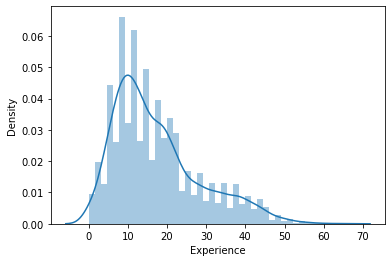

In [16]:
#Lets check for distribution of this column
sns.distplot(train['Experience'])

We can data almost normal distribued , slightly right skewed.

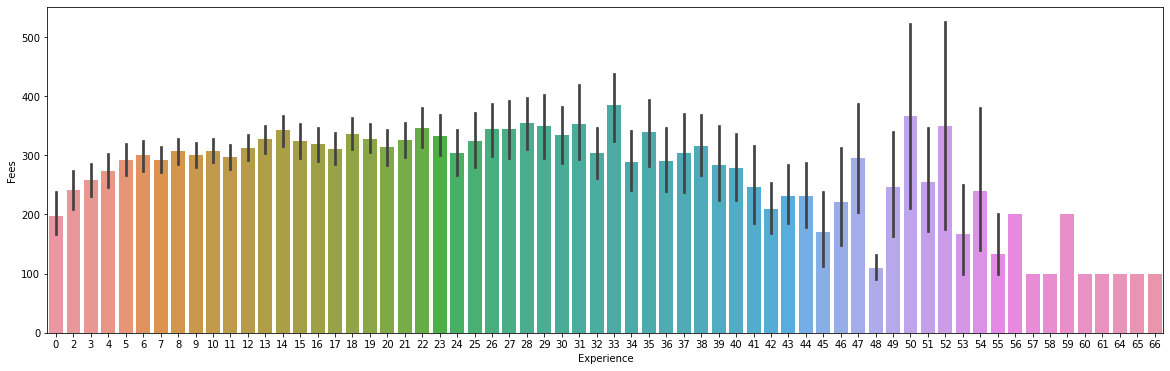

In [17]:
#lets plot the experience column against our target variable
plt.figure(figsize=(20,6))
sns.barplot(x = train['Experience'],y =train['Fees'])
plt.show()

we can see that as the experience increases consultation fee increases, but after 33 year experience the consultation fee decreased and at 50 again the consultation fee increased but later again the fee decreased.

### Rating Column

In [18]:
#there are many null values in this column 
train.Rating.isnull().sum()

3302

In [19]:
#Lets fill null values with 0%.
train['Rating'].fillna('0%',inplace=True)

In [20]:
#converting to int datatype
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

In [21]:
#coverting data between 0-10 rating
train['Rating']=train['Rating']*0.1

In [22]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_new
0,"BHMS, MD - Homeopathy",24,10.0,"Kakkanad, Ernakulam",Homeopath,100,Masters
1,"BAMS, MD - Ayurveda Medicine",12,9.8,"Whitefield, Bangalore",Ayurveda,350,Masters
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,300,Masters
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,250,Bachelors
4,BAMS,20,10.0,"Keelkattalai, Chennai",Ayurveda,250,Bachelors


<AxesSubplot:xlabel='Rating', ylabel='Density'>

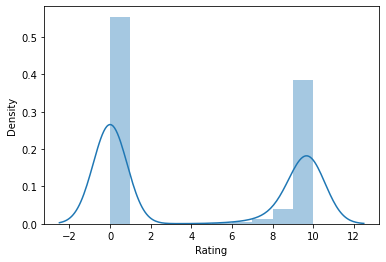

In [23]:
#Lets check for distribution in this column
sns.distplot(train['Rating'])

Rating 0 is high which are missed values, other than that most of them have rating between 9-10.

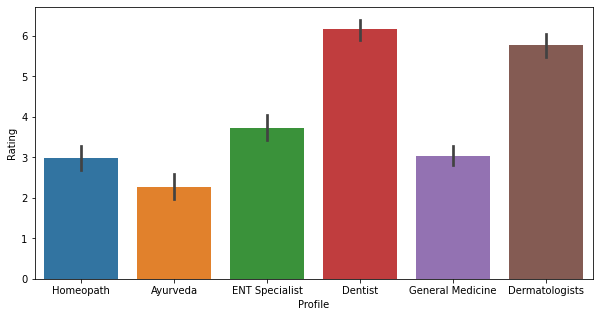

In [24]:
#bar plot for profile and rating
plt.figure(figsize= (10,5))
sns.barplot(x ='Profile',y = 'Rating' , data = train)
plt.show()

We can see that rating of dentist quite high compared to all, Ayurved specialist  is low.

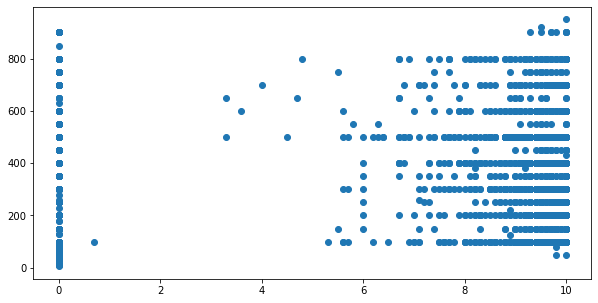

In [25]:
#Scatter plot for rating and target variable
plt.figure(figsize= (10,5))
plt.scatter(train['Rating'], train['Fees'])
plt.show()

We can see that most of fees are in between 8-10 ratings.

### Place Column

In [26]:
#splitting places into area and city
train['Place'].fillna('missing, missing', inplace = True)
place_split = train['Place'].str.split(', ', expand = True)
train['Area'] = place_split[0]
train['City'] = place_split[1]
train.drop(columns = 'Place', axis =1, inplace = True)

In [27]:
train.head()

,Qualification,Experience,Rating,Profile,Fees,Qualification_new,Area,City
0,"BHMS, MD - Homeopathy",24,10.0,Homeopath,100,Masters,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,9.8,Ayurveda,350,Masters,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0.0,ENT Specialist,300,Masters,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0.0,Ayurveda,250,Bachelors,Bannerghatta Road,Bangalore
4,BAMS,20,10.0,Ayurveda,250,Bachelors,Keelkattalai,Chennai


In [28]:
train['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
missing                 25
Sector 5                 1
Name: City, dtype: int64

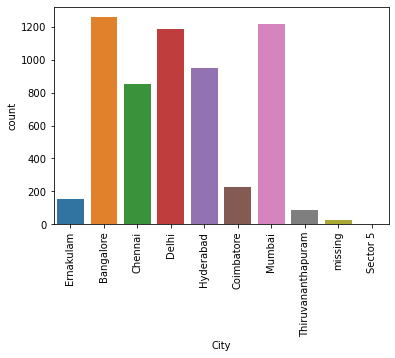

In [29]:
#count plot for city column
sns.countplot(x='City',data=train)
plt.xticks(rotation=90)
plt.show()

In Bangalore, Delhi and Mumbai have more specialist doctors and Ernakulam and coimbatore have less specialist doctors.

In [30]:
train['City'] = np.where(train['City']=="Sector 5","Delhi", train['City'])

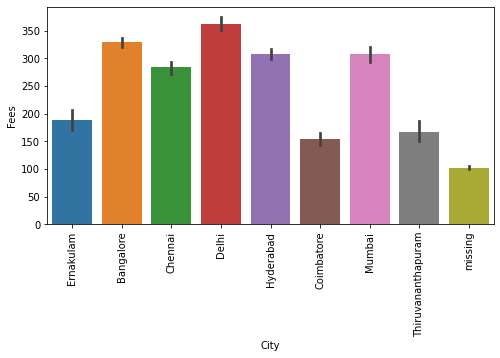

In [31]:
#bar plot for city and target variable
plt.figure(figsize= (8,4))
sns.barplot(x ='City',y = 'Fees' , data = train)
plt.xticks(rotation=90)
plt.show()

we can see that fee charged by doctors in delhi is very high.

In [32]:
train.drop(['Qualification','Area'],axis=1,inplace=True)

In [33]:
train.head()

,Experience,Rating,Profile,Fees,Qualification_new,City
0,24,10.0,Homeopath,100,Masters,Ernakulam
1,12,9.8,Ayurveda,350,Masters,Bangalore
2,9,0.0,ENT Specialist,300,Masters,Bangalore
3,12,0.0,Ayurveda,250,Bachelors,Bangalore
4,20,10.0,Ayurveda,250,Bachelors,Chennai


### Label Encoding 

In [34]:
#Label Encoding the columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
L1=['City','Profile','Qualification_new']
for val in L1:
    train[val]=le.fit_transform(train[val].astype(str))

In [35]:
train.head()

,Experience,Rating,Profile,Fees,Qualification_new,City
0,24,10.0,5,100,1,4
1,12,9.8,0,350,1,0
2,9,0.0,3,300,1,0
3,12,0.0,0,250,0,0
4,20,10.0,0,250,0,1


### Checking Correlation

In [36]:
#lets check the correlation of theses columns  with target vraibale
train.corr()

,Experience,Rating,Profile,Fees,Qualification_new,City
Experience,1.000000,-0.038569,0.202073,0.002117,0.001681,0.017650
Rating,-0.038569,1.000000,-0.126389,0.153273,0.168509,-0.102808
Profile,0.202073,-0.126389,1.000000,0.145226,-0.011979,-0.015087
Fees,0.002117,0.153273,0.145226,1.000000,0.243064,-0.035914
Qualification_new,0.001681,0.168509,-0.011979,0.243064,1.000000,-0.038497
City,0.017650,-0.102808,-0.015087,-0.035914,-0.038497,1.000000


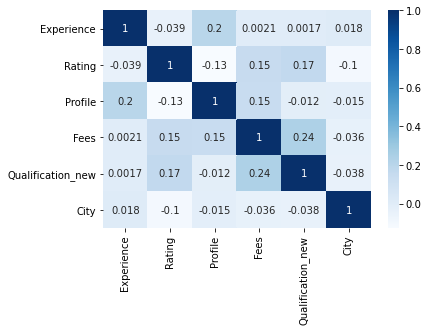

In [37]:
#correlation
cor_matrix = train.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

### Checking Outliers using Boxplot

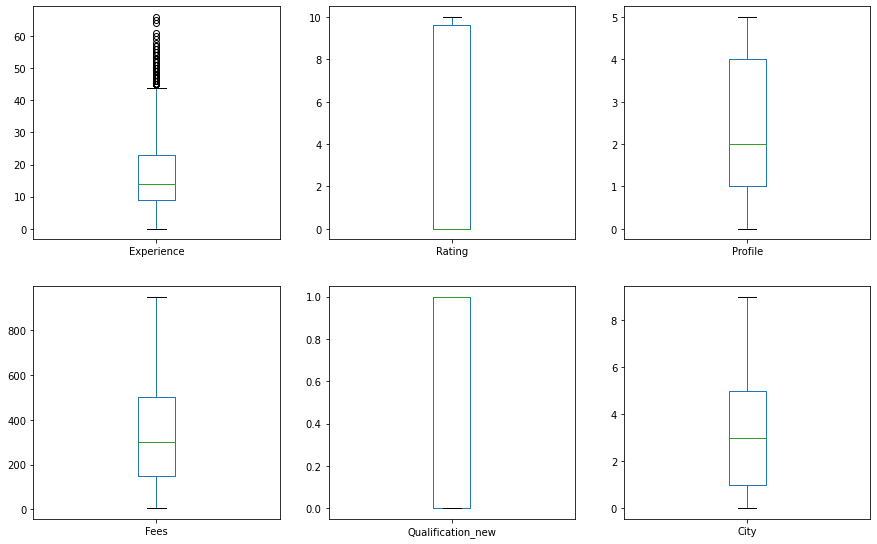

In [38]:
#Plotting bosplot to check the outliers in the datset
train.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

### Removing Outliers

In [39]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(train))

In [40]:
train_new=train[(z<3).all(axis=1)]
print(train.shape)
print(train_new.shape)

(5961, 6)
(5903, 6)


In [41]:
loss_percent=((5961-5903)/5961)*100
loss_percent

0.9729911088743499

We can observe that there is only 1% data is removed. So we remove Outliers and create model.

### Checking Skewness

In [42]:
train.skew()

Experience           0.991089
Rating               0.247186
Profile              0.108803
Fees                 0.751870
Qualification_new   -0.207500
City                 0.011616
dtype: float64

### Splitting the dataset into x and y

In [116]:
x=train_new.drop('Fees',axis=1)
y=train_new['Fees']

In [117]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.7647372 ,  1.14312676,  1.42148032,  0.89948397,  0.48916463],
       [-0.3203077 ,  1.13207104, -1.64275708,  0.89948397, -1.44668709],
       [-0.68745117, -0.89935488,  0.42674581,  0.89948397, -1.44668709],
       ...,
       [ 1.83157636,  1.12644476,  0.9450599 , -1.11174855,  0.10052928],
       [-0.00358446,  1.08508632,  0.9450599 ,  0.89948397,  1.18023751],
       [ 0.18711403,  1.14312676, -0.81394579,  0.89948397,  0.10052928]])

Skewness had been removed

In [118]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.7647372 ,  1.14312676,  1.42148032,  0.89948397,  0.48916463],
       [-0.3203077 ,  1.13207104, -1.64275708,  0.89948397, -1.44668709],
       [-0.68745117, -0.89935488,  0.42674581,  0.89948397, -1.44668709],
       ...,
       [ 1.83157636,  1.12644476,  0.9450599 , -1.11174855,  0.10052928],
       [-0.00358446,  1.08508632,  0.9450599 ,  0.89948397,  1.18023751],
       [ 0.18711403,  1.14312676, -0.81394579,  0.89948397,  0.10052928]])

In [119]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(5903, 5)
(5903,)


### Checking best Random state

In [120]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    r2 = r2_score(y_test, predLR)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.13290137700378268 on Random State 496


## Creating model

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=496)

In [122]:
models=[LinearRegression(),
        Lasso(),Ridge(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
             "Lasso",'Ridge',
            'SVR',
            'DecisionTreeRegressor',
            'KNeighborsRegressor',
            'RandomForestRegressor',
            'AdaBoostRegressor',
            'GradientBoostingRegressor']

Acc=[]
r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for i in range(len(models)):
    mod=models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    Acc.append(mod.score(x_train,y_train))
    r2.append(r2_score(y_test, pred))
    mse.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    
    
d={'Model':model_names,
   'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Model,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.132901,144.081423,30668.424058,175.124025
1,Lasso,0.131973,144.246628,30701.262276,175.217757
2,Ridge,0.132892,144.082924,30668.761580,175.124988
3,SVR,0.102666,141.764709,31737.826687,178.151134
4,DecisionTreeRegressor,-0.471852,167.355021,52057.965346,228.162147
5,KNeighborsRegressor,0.047106,143.508413,33702.909610,183.583522
6,RandomForestRegressor,-0.008741,146.825945,35678.160344,188.886634
7,AdaBoostRegressor,0.138315,145.133171,30476.937422,174.576452
8,GradientBoostingRegressor,0.215482,131.884493,27747.630926,166.576202


Here we observe that R2 score for **GradientBoostingRegressor** is high and errors also less compared to other models.

### Checking Cross validation Score

In [123]:
from sklearn.model_selection import cross_val_score
cross=[]
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    cross.append(scr.mean())   
difference={'Model':model_names,'R2_score':r2,"Cross_val_score":cross}
acc_frame=pd.DataFrame(difference)
acc_frame

,Model,R2_score,Cross_val_score
0,LinearRegression,0.132901,0.100438
1,Lasso,0.131973,0.100569
2,Ridge,0.132892,0.100438
3,SVR,0.102666,0.073293
4,DecisionTreeRegressor,-0.471852,-0.412373
5,KNeighborsRegressor,0.047106,0.022441
6,RandomForestRegressor,-0.008741,0.004563
7,AdaBoostRegressor,0.138315,0.125930
8,GradientBoostingRegressor,0.215482,0.202497


Here we observe that R2_score and Cross val score difference is less for **GradientBoostingRegresso**r. Lets take **GradientBoostingRegressor** has our best model and hypertune the model.

### Hyper Tuning the Model

In [124]:
#Finding best Parameters for Ensemble Techniques
from sklearn.model_selection import GridSearchCV

In [125]:
parameters={'criterion':['friedman_mse','mse','mae'],'max_features':['auto','sqrt','log2']}
gb=GradientBoostingRegressor()
GBR=GridSearchCV(gb,parameters,cv=5)
GBR.fit(x_train,y_train)

print(GBR.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto'}


In [60]:
GBR_model=GradientBoostingRegressor(criterion='friedman_mse',
                            max_features = 'sqrt')
GBR_model.fit(x_train,y_train)
predgb = GBR_model.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,predgb))
print('Mean squared Error= ', mean_squared_error(y_test,predgb))
print('Root Mean Absolute Error=', np.sqrt(mean_absolute_error(y_test,predgb)))
print('\nR2 Score=',r2_score(y_test,predgb))

Mean Absolute Error=  132.21935062005835
Mean squared Error=  28333.501451546676
Root Mean Absolute Error= 11.49866734104689

R2 Score= 0.22031995293730278


### Lets plot the final Graph for Actual and Predicted output values

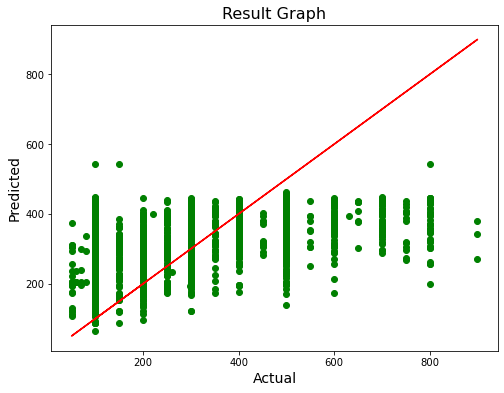

In [61]:
# Final output Graph
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color="g")
plt.plot(y_test,y_test,color="r")
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Result Graph",fontsize=16)
plt.show()

### Saving the model

In [133]:
import pickle, joblib

filename = 'doctor_consultation_fee.pkl'
pickle.dump(GBR , open(filename, 'wb'))

### Loading the Model

In [134]:
GBR_new=joblib.load('doctor_consultation_fee.pkl','rb')
Predicted = GBR_new.predict(x_test)
Predicted

array([439.64037934, 340.30537068, 386.55539119, ..., 409.14256111,
       275.04983496, 348.5847698 ])

In [135]:
Final=np.array(y_test)
Final

array([100, 300, 200, ..., 300, 300, 500], dtype=int64)

In [136]:
predict=np.array(GBR_new.predict(x_test))
predict

array([439.64037934, 340.30537068, 386.55539119, ..., 409.14256111,
       275.04983496, 348.5847698 ])

In [137]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))
df_pred

,original,predicted
0,100,439.640379
1,300,340.305371
2,200,386.555391
3,100,202.799798
4,500,316.717964
...,...,...
1766,500,361.249543
1767,400,392.667921
1768,300,409.142561
1769,300,275.049835


## Test Dataset

In [69]:
#since it is xlsx file , lets use read_excel method
import pandas as pd
test1= pd.read_excel('Final_Test.xlsx')
sample=pd.read_excel('Sample_submission.xlsx')

In [70]:
#test dataset
test1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [71]:
sample.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


In [72]:
test1.shape

(1987, 6)

In [73]:
sample.shape

(1987, 1)

In [74]:
test1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [75]:
test1.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [76]:
test1.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

These are columns with null values:
    
Miscellaneous_Info    834

Place                   6

Rating                1090

In [77]:
test=pd.concat([test1,sample],axis=1)
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,1747
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,1725
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2194
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,2193
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,2091


In [78]:
#we have 834 different values in Miscellaneous_Info.
#and also we already rating column and place column which is already extracted from Miscellaneous_info column
#there is no useful data to predict Target varibale in this column
test.drop(['Miscellaneous_Info'],axis = 1,inplace = True)
test.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,1747
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,1725
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,2194
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,2193
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,2091


## Exploratory Data Analysis for each Column

### Qualification Column

In [79]:
#In Qualification column we have below details:

#The only information we can extract from qualification column is :
#if doctor has only Bachelors or masters
#because we already have there profile details in profile column
test.Qualification

0                                                  MBBS
1            MBBS, Diploma in Otorhinolaryngology (DLO)
2                                            MBBS, DDVL
3                                                  BAMS
4       BDS, MDS - Conservative Dentistry & Endodontics
                             ...                       
1982                           BAMS, Doctor of Medicine
1983     MD - Dermatology , Venereology & Leprosy, MBBS
1984           MBBS, MD / MS - Obstetrics & Gynaecology
1985                                                BDS
1986     MBBS, MD - Dermatology , Venereology & Leprosy
Name: Qualification, Length: 1987, dtype: object

In [80]:
Bachelors_list = ['BHMS','BAMS','BDS','BSc','MBBS']   #creating the list of bachelor degrees

Masters_list = ['MD', 'MS', 'MF', 'DNB', 'MDS','DDVL','IBCLC','AFIH','DDV','PGD']  #creating the list of master degrees

test['Qualification_new'] = 'Bachelors'  #first lets make everything As "Bachelors'"

x = 0 #row number

for i in test.Qualification:
    for j in Masters_list:
        if j in str(i).split():
            test.loc[[x],'Qualification_new'] = 'Masters'
            break
    x += 1

In [81]:
test.loc[:,['Qualification','Qualification_new']]

,Qualification,Qualification_new
0,MBBS,Bachelors
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",Bachelors
2,"MBBS, DDVL",Masters
3,BAMS,Bachelors
4,"BDS, MDS - Conservative Dentistry & Endodontics",Masters
...,...,...
1982,"BAMS, Doctor of Medicine",Bachelors
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",Masters
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",Masters
1985,BDS,Bachelors


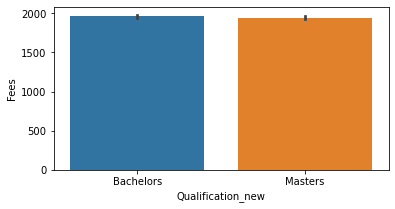

In [82]:
plt.figure(figsize= (6,3))
sns.barplot(x ='Qualification_new',y = 'Fees' , data =test)
plt.show()

We can clearly see that doctors  fee is almost equal for Bachelors and masters.

### Experience Column

In [83]:
#Lets begin with experience columns by extracting useful information
test.Experience.head()

0    35 years experience
1    31 years experience
2    40 years experience
3     0 years experience
4    16 years experience
Name: Experience, dtype: object

In [84]:
#lets extract the numberical values from this column
for i in range(len(test)):
    test['Experience'][i]=test['Experience'][i][:-17]
    
test['Experience']=test['Experience'].astype(int)

In [85]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_new
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,1747,Bachelors
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,1725,Bachelors
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,2194,Masters
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,2193,Bachelors
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,2091,Masters


<AxesSubplot:xlabel='Experience', ylabel='Density'>

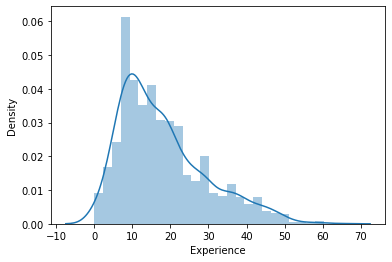

In [86]:
#Lets check for distribution of this column
sns.distplot(test['Experience'])

We can see data almost normal distribued , slightly right skewed.

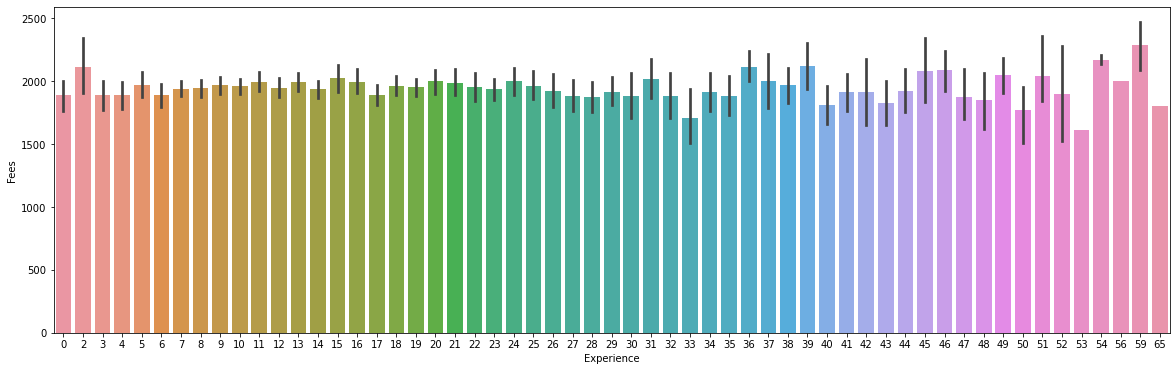

In [87]:
#lets plot the experience column against our target variable
plt.figure(figsize=(20,6))
sns.barplot(x = test['Experience'],y =test['Fees'])
plt.show()

There is slight change in fee according to experience

### Rating Column

In [88]:
#there are many null values in this column 
test.Rating.isnull().sum()

1090

In [89]:
#Lets fill null values with 0%.
test['Rating'].fillna('0%',inplace=True)

In [90]:
#converting to int datatype
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)

In [91]:
#coverting data between 0-10 rating
test['Rating']=test['Rating']*0.1

In [92]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_new
0,MBBS,35,0.0,"Ghatkopar East, Mumbai",General Medicine,1747,Bachelors
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0.0,"West Marredpally, Hyderabad",ENT Specialist,1725,Bachelors
2,"MBBS, DDVL",40,7.0,"KK Nagar, Chennai",Dermatologists,2194,Masters
3,BAMS,0,0.0,"New Ashok Nagar, Delhi",Ayurveda,2193,Bachelors
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,"Kanakpura Road, Bangalore",Dentist,2091,Masters


<AxesSubplot:xlabel='Rating', ylabel='Density'>

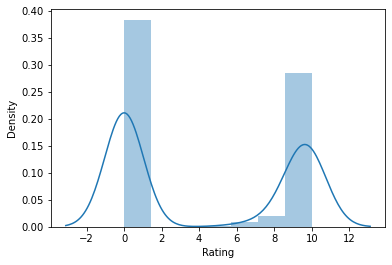

In [93]:
#Lets check for distribution in this column
sns.distplot(test['Rating'])

Rating 0 is high which are missed values, other than that most of them have rating between 9-10.

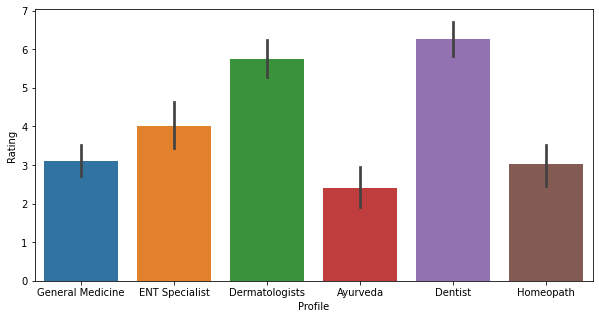

In [94]:
plt.figure(figsize= (10,5))
sns.barplot(x ='Profile',y = 'Rating' , data = test)
plt.show()

We can see that rating of dentist quite high compared to all, Ayurved specialist  is low.

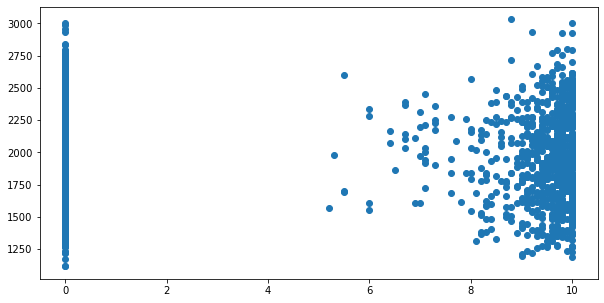

In [95]:
plt.figure(figsize= (10,5))
plt.scatter(test['Rating'], test['Fees'])
plt.show()

We can see that most of fees are in between 8-10 ratings.

### Place Column

In [96]:
#splitting places into area and city
test['Place'].fillna('missing, missing', inplace = True)
place_split = test['Place'].str.split(', ', expand = True)
test['Area'] = place_split[0]
test['City'] = place_split[1]
test.drop(columns = 'Place', axis =1, inplace = True)

In [97]:
test.head()

,Qualification,Experience,Rating,Profile,Fees,Qualification_new,Area,City
0,MBBS,35,0.0,General Medicine,1747,Bachelors,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0.0,ENT Specialist,1725,Bachelors,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,7.0,Dermatologists,2194,Masters,KK Nagar,Chennai
3,BAMS,0,0.0,Ayurveda,2193,Bachelors,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,10.0,Dentist,2091,Masters,Kanakpura Road,Bangalore


In [98]:
test['City'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
missing                 6
Name: City, dtype: int64

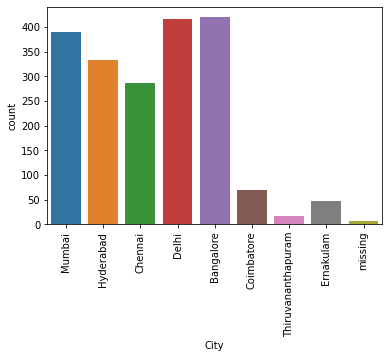

In [99]:
sns.countplot(x='City',data=test)
plt.xticks(rotation=90)
plt.show()

In Bangalore, Delhi have more specialist doctors and Ernakulam and coimbatore have less specialist doctors.

In [100]:
test['City'] = np.where(test['City']=="Sector 5","Delhi", test['City'])

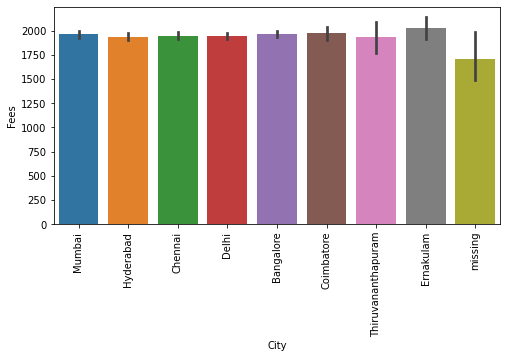

In [101]:
plt.figure(figsize= (8,4))
sns.barplot(x ='City',y = 'Fees' , data = test)
plt.xticks(rotation=90)
plt.show()

Almost all cities consultation fees are similar

In [102]:
test.drop(['Qualification','Area'],axis=1,inplace=True)

In [103]:
test.head()

,Experience,Rating,Profile,Fees,Qualification_new,City
0,35,0.0,General Medicine,1747,Bachelors,Mumbai
1,31,0.0,ENT Specialist,1725,Bachelors,Hyderabad
2,40,7.0,Dermatologists,2194,Masters,Chennai
3,0,0.0,Ayurveda,2193,Bachelors,Delhi
4,16,10.0,Dentist,2091,Masters,Bangalore


### Label Encoding

In [104]:
#Label Encoding the columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
L1=['City','Profile','Qualification_new']
for val in L1:
    test[val]=le.fit_transform(test[val].astype(str))

In [105]:
test.head()

,Experience,Rating,Profile,Fees,Qualification_new,City
0,35,0.0,4,1747,0,6
1,31,0.0,3,1725,0,5
2,40,7.0,2,2194,1,1
3,0,0.0,0,2193,0,3
4,16,10.0,1,2091,1,0


### Checking Correlation

In [106]:
#lets check the correlation of theses columns  with target vraibale
test.corr()

,Experience,Rating,Profile,Fees,Qualification_new,City
Experience,1.000000,-0.019059,0.154077,0.009545,-0.009743,-0.008124
Rating,-0.019059,1.000000,-0.134298,-0.002012,0.167005,-0.045163
Profile,0.154077,-0.134298,1.000000,-0.024185,0.006586,0.029252
Fees,0.009545,-0.002012,-0.024185,1.000000,-0.021475,-0.013418
Qualification_new,-0.009743,0.167005,0.006586,-0.021475,1.000000,-0.035508
City,-0.008124,-0.045163,0.029252,-0.013418,-0.035508,1.000000


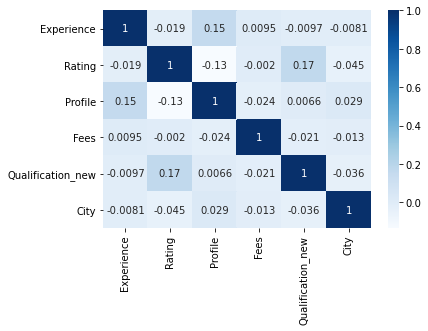

In [107]:
#correlation
cor_matrix = test.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

We can see that no column is having good correlation with target varibale.

### Checking Outliers using Boxplot

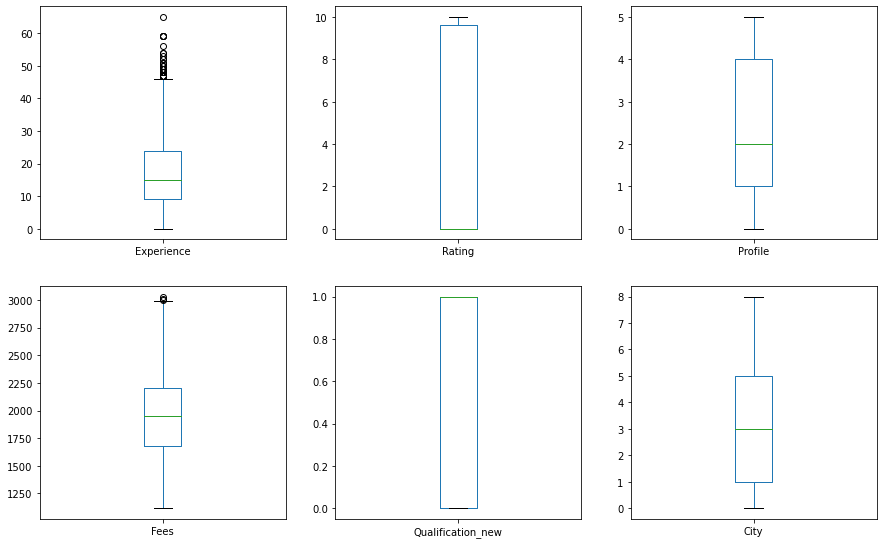

In [108]:
#Plotting bosplot to check the outliers in the datset
test.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

Only experience and Fees columns have outliers

### Removing Outliers

In [109]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(test))

In [110]:
test_new=test[(z<3).all(axis=1)]
print(test.shape)
print(test_new.shape)

(1987, 6)
(1975, 6)


In [111]:
loss_percent=((1987-1975)/1987)*100
loss_percent

0.6039255158530448

We can observe that there is only 0.6% data is removed. So we remove Outliers and create model.

In [112]:
test.skew()

Experience           0.963447
Rating               0.225321
Profile              0.028926
Fees                 0.144892
Qualification_new   -0.230165
City                 0.007716
dtype: float64

In [126]:
x_test_real=test_new.drop('Fees',axis=1)
y=test_new['Fees']

In [127]:
x_test_real.shape

(1975, 5)

## Now Lets Predict Our Original test dataset

### Loading the Model

In [141]:
GBR_1=joblib.load('doctor_consultation_fee.pkl','rb')
Predicted = GBR_1.predict(x_test_real)
Predicted

array([607.81493833, 607.81493833, 396.43086086, ..., 500.09913021,
       243.80133183, 500.09913021])

## conclusion

In [145]:
conclusion = pd.DataFrame({'Predicted': Predicted})
conclusion

,Predicted
0,607.814938
1,607.814938
2,396.430861
3,323.176325
4,243.801332
...,...
1970,289.491712
1971,500.099130
1972,500.099130
1973,243.801332


KeyboardInterrupt: 